In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

import sys
sys.path.insert(0, 'drive/hyper_parameters')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drive/hyper_parameters/bank.csv')
print('Satir, sutun : {0}'.format(df.shape))
print('')
df.head(10)

Satir, sutun : (11162, 17)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


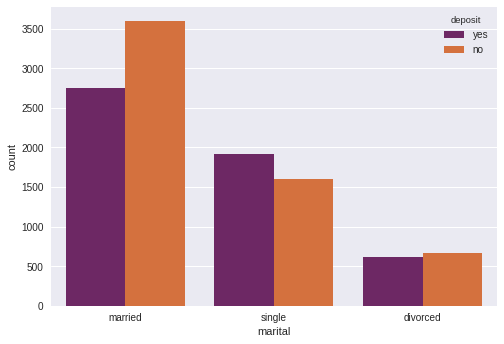

In [6]:
sns.countplot(x = 'marital', hue = 'deposit', data=df,palette = 'inferno')
plt.show()

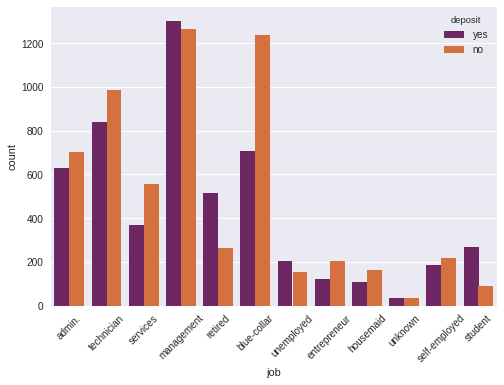

In [7]:
sns.countplot(x = 'job', hue = 'deposit', data=df,palette = 'inferno')
plt.xticks(rotation=45)
plt.show()

In [8]:
columns = df.select_dtypes(include='object').columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'deposit', 'deposit_no'], axis =1)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1


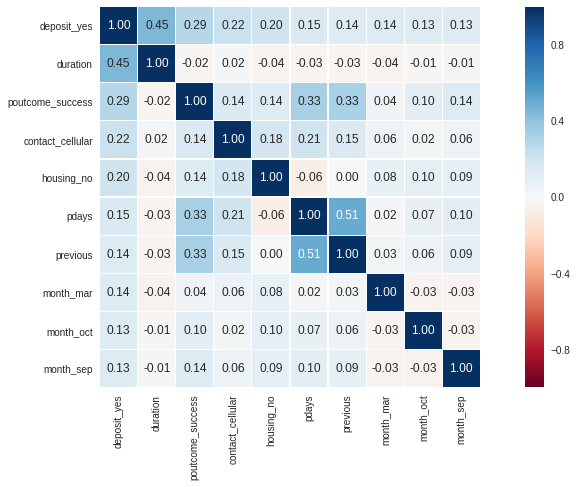

In [9]:
a,x = plt.subplots(figsize=(16, 7))
corr = df.corr()
max_corr = corr.nlargest(10, 'deposit_yes')['deposit_yes'].index
cm = np.corrcoef(df[max_corr].values.T)
matrix = sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
                 linewidths= 0.1, vmax = 1, cmap = 'RdBu',
                  yticklabels=max_corr.values, xticklabels=max_corr.values, ax = x)
plt.show()

In [0]:
y = df.deposit_yes
df = df.drop(['deposit_yes'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

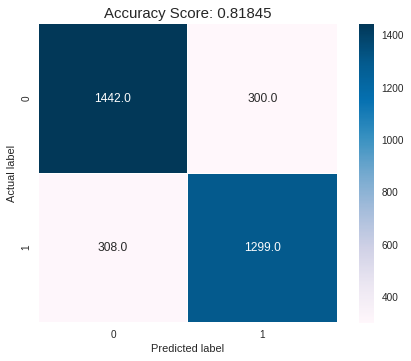

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                            random_state=0, max_features= 10, 
                            max_depth= 5)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

score = round(accuracy_score(y_test, rf_predict),5)
cm1 = cm(y_test, rf_predict)

sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                 n_jobs=-1, random_state=0, max_features= 10, 
                            max_depth= 5), 
                              X_train, y_train, cv=5))
print('')
print('mean of cv-scores {0}'.format(np.mean(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                 n_jobs=-1, random_state=42, max_features= 10, 
                            max_depth= 5), 
                              X_train, y_train, cv=5))))

[0.81905371 0.80038388 0.82074264 0.83034571 0.83034571]

mean of cv-scores 0.824396650915


In [17]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=0)

rf_params = {'max_depth': range(3,13), 'max_features': range(5,15)}

rf_grid = GridSearchCV(rf, rf_params,
                           cv=5, n_jobs=-1, 
                       verbose=True)

rf_grid.fit(X_train, y_train)
print('')
print(rf_grid.best_params_)
print('Best cv result {0}'.format(rf_grid.best_score_))
print('Best holdout result {0}'.format(accuracy_score(y_test, rf_grid.predict(X_test))))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.1min finished



{'max_features': 9, 'max_depth': 12}
Best cv result 0.852937412006
Best holdout result 0.843236787101
